In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import pandas as pd
from scipy.stats import norm

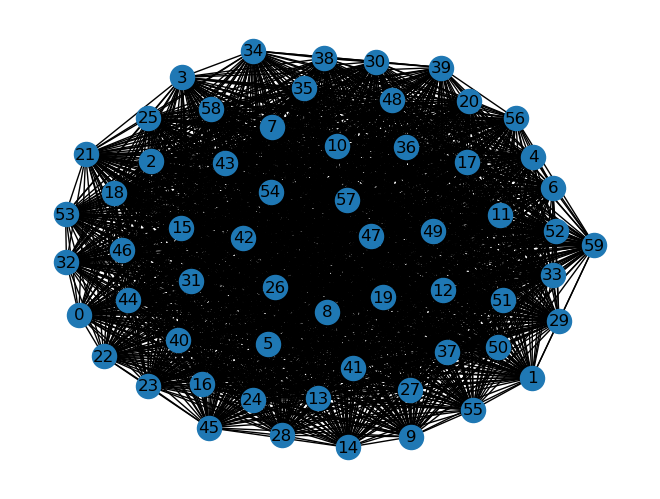

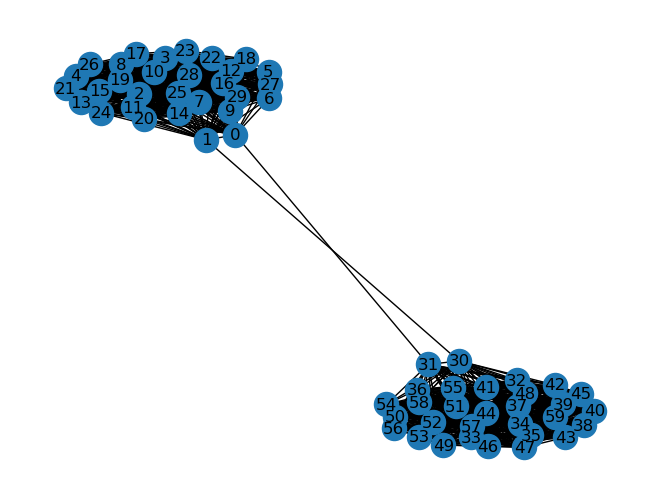

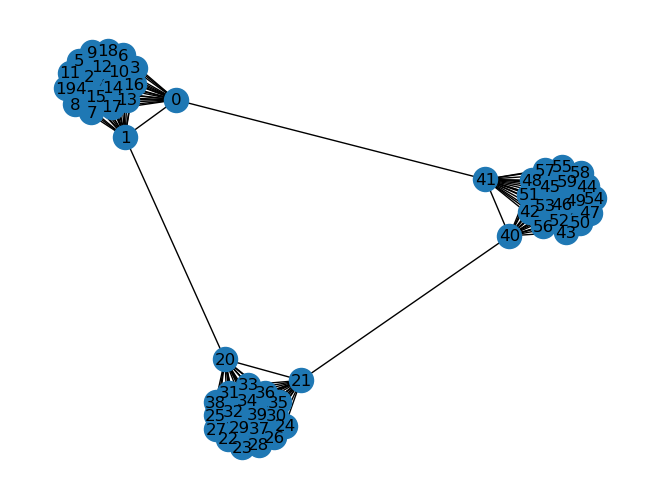

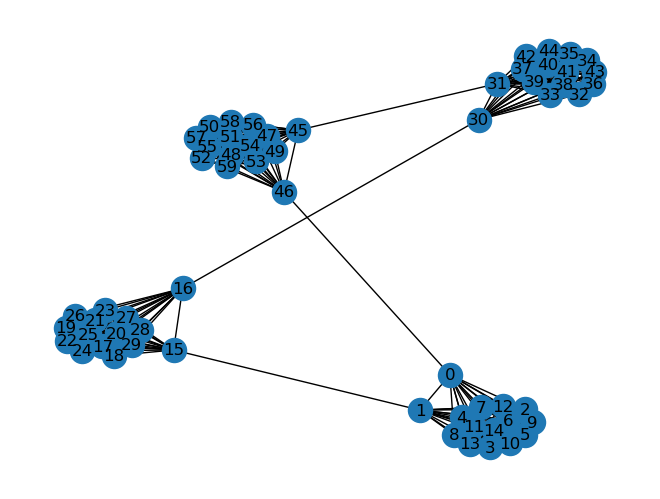

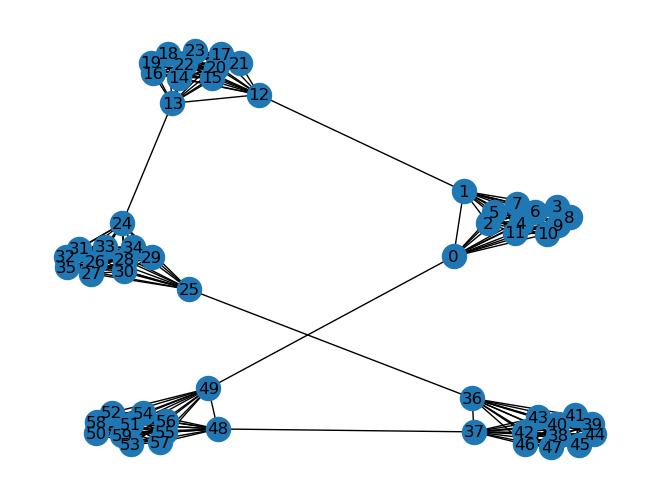

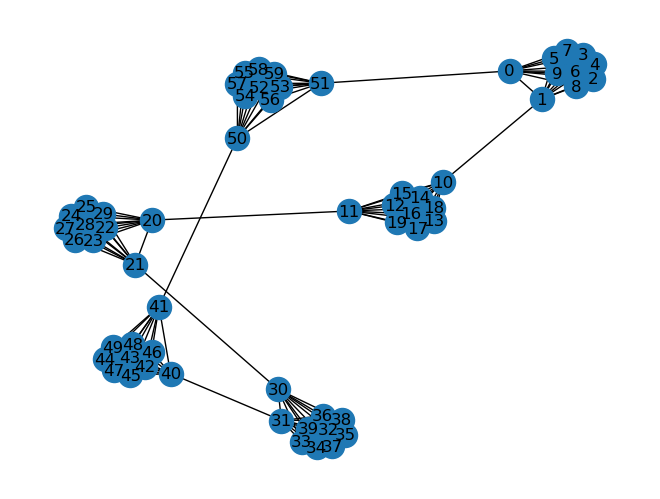

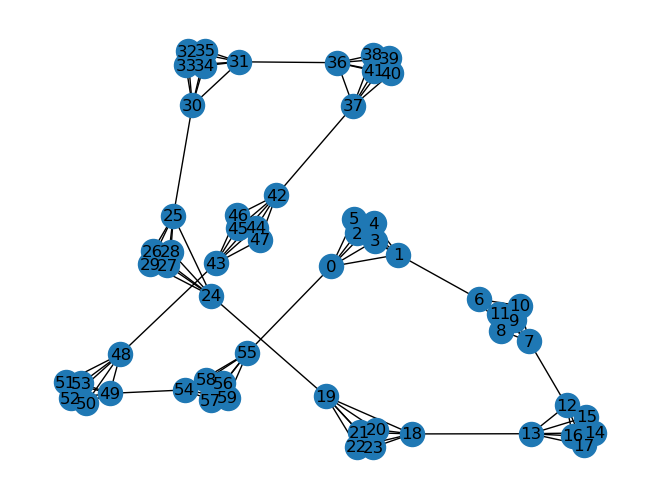

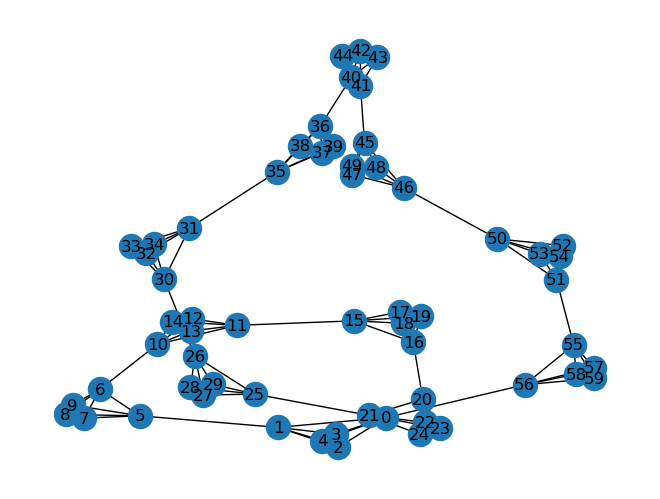

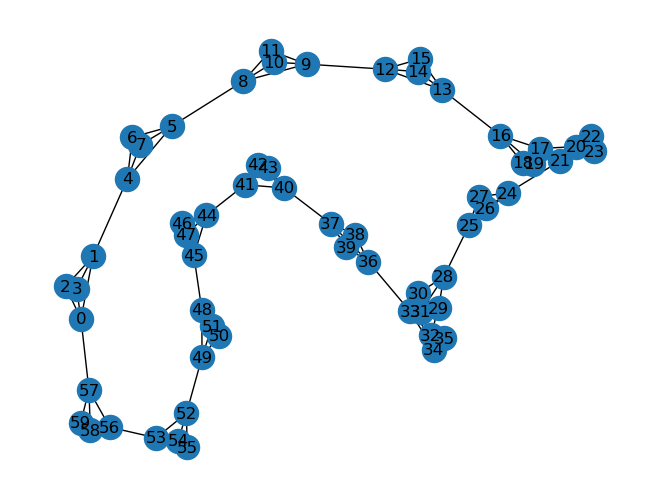

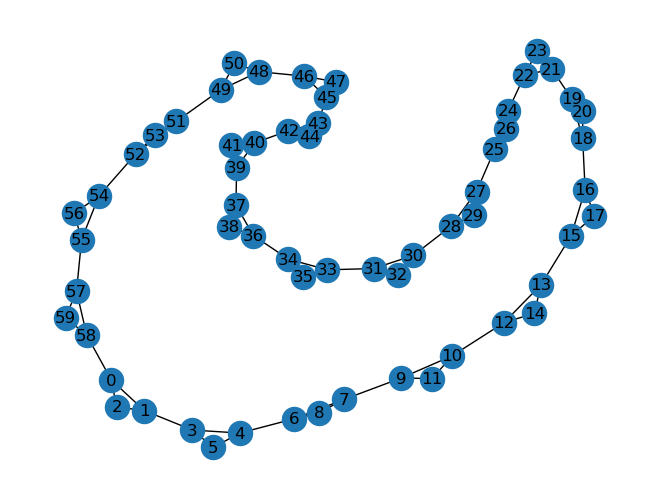

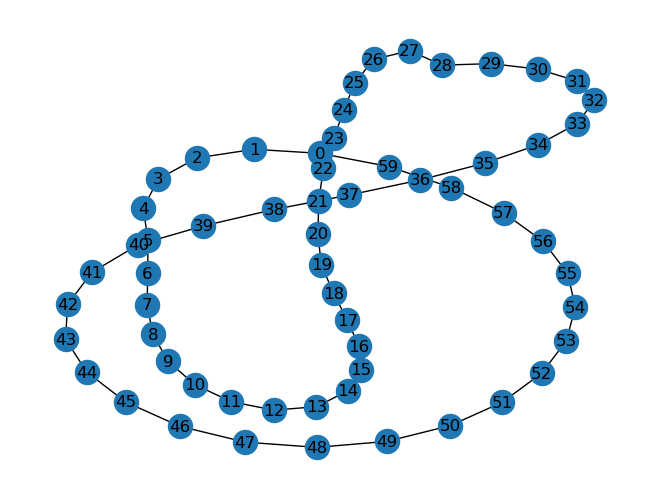

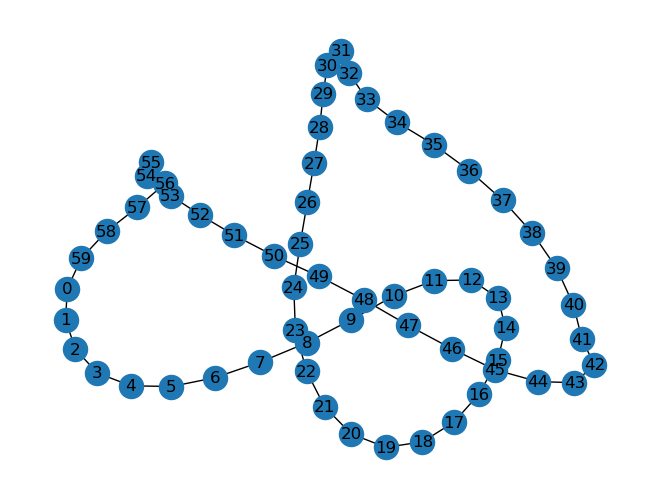

In [2]:
max_sim = 100
steps = 100
G_size = 60

graphs_name = ["complete","2-30","3-20","4-15","5-12","6-10","10-6","12-5","15-4","20-3","30-2","ring"]
max_innovate = pd.DataFrame(index=range(max_sim),columns=range(len(graphs_name)))

G = [None] * len(graphs_name)

G[0] = nx.complete_graph(60)
G[1] = nx.ring_of_cliques(2, 30)
G[2] = nx.ring_of_cliques(3, 20)
G[3] = nx.ring_of_cliques(4, 15)
G[4] = nx.ring_of_cliques(5, 12)
G[5] = nx.ring_of_cliques(6, 10)
G[6] = nx.ring_of_cliques(10, 6)
G[7] = nx.ring_of_cliques(12, 5)
G[8] = nx.ring_of_cliques(15, 4)
G[9] = nx.ring_of_cliques(20, 3)
G[10] = nx.ring_of_cliques(30, 2)
G[11] = nx.cycle_graph(60)

for i in range(len(graphs_name)):
    nx.draw(G[i], with_labels=True)
    plt.show()

In [3]:
for g in range(len(G)):

    for sim in range(max_sim):
        v1 = [0] * G_size
        neighbour_v1 =[0] * G_size
        neighbour_v1cdf =[0] * G_size
        innovation =[0] * G_size
        new_v1 =[0] * G_size
        v1dict = { i : v1[i] for i in range(G_size) }
        nx.set_node_attributes(G[g], v1dict, "v1")

        max_innovate[g][sim] = 0

        for step in range(steps):
            v1 += np.random.normal(0, 1, size=(G_size))
            v1dict = { i : v1[i] for i in range(G_size) }
            nx.set_node_attributes(G[g], v1dict, "v1")

            for i in range(G_size):
                neighbour_v1[i] = [(G[g].nodes[j]["v1"]) for j in list(G[g].neighbors(i))]
                #neighbour_v1cdf[i] = [norm.cdf(G[g].nodes[j]["v1"]) for j in list(G[g].neighbors(i))]
                #innovation[i] = abs(max(np.array(norm.cdf(G[g].nodes[i]["v1"])*len(neighbour_v1cdf[i])) - np.array(neighbour_v1cdf[i]), key=abs))
                innovation[i] = abs(max(np.repeat(G[g].nodes[i]["v1"], len(neighbour_v1[i])) - np.array(neighbour_v1[i]), key=abs))
                new_v1[i] = mean(np.append(neighbour_v1[i],G[g].nodes[i]["v1"]))

            v1 = new_v1
            max_innovate[g][sim] = max(np.append(innovation,max_innovate[g][sim]))


In [4]:
max_innovate = max_innovate.apply(pd.to_numeric)
max_innovate.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.493772,6.516469,6.779618,6.830143,6.817567,6.776865,6.572509,6.527374,6.383081,6.251303,6.185472,6.169610
std,0.353885,0.551575,1.067896,0.868649,0.796103,0.812879,0.667356,0.533296,0.584178,0.525530,0.498227,0.500189
min,5.797409,5.543808,5.603720,5.549045,5.490430,5.397200,5.353845,5.657558,5.344735,5.270706,5.260491,5.230764
25%,6.222974,6.175492,6.164934,6.170321,6.221992,6.152924,6.155187,6.143027,5.992667,5.887050,5.835739,5.849736
50%,6.436569,6.431018,6.429778,6.614844,6.676808,6.619609,6.416673,6.444990,6.244704,6.219526,6.156731,6.084495
75%,6.736048,6.745060,7.076916,7.482740,7.290213,7.207491,6.879322,6.940631,6.691315,6.456459,6.447762,6.378158
max,7.231545,8.750402,11.079837,9.562853,9.390949,9.055854,9.737746,7.650253,8.230993,7.706967,7.600609,7.652630
